## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('drive/MyDrive/BigMart/Train_preprocessed9.csv')
df.head()

,Unnamed: 0,Item_Weight,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,log_Item_Visibility,Type1_Tear1,Type1_Tear2
0,0,9.30,249.8092,8.225808,14,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.015920,1,0
1,1,5.92,48.2692,6.096776,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.019095,0,0
2,2,17.50,141.6180,7.648868,14,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.016621,1,0
3,3,19.20,182.0950,6.597664,15,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.064037,0,0
4,4,8.93,53.8614,6.903451,26,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.064037,0,0


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.columns

Index(['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0',
       'New_Item_Type_1', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3',
       'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7',
       'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11',
       'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'log_Item_Visibility',
       'Type1_Tear1', 'Type1_Tear2'],
      dtype='object')

In [ ]:
df.shape

(8523, 42)

In [ ]:
# statistical info
df.describe()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,log_Item_Visibility,Type1_Tear1,Type1_Tear2
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875419,140.992782,7.297863,15.168133,0.459697,0.187610,0.174469,0.545348,0.280183,0.326763,0.127068,0.654347,0.108882,0.093746,0.718644,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.076030,0.029450,0.012906,0.076147,0.080019,0.100434,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.066857,0.218233,0.326763
std,4.645008,62.275067,1.015211,8.371760,0.498402,0.390423,0.379535,0.497969,0.449115,0.469057,0.333069,0.475609,0.311509,0.291493,0.449687,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.265061,0.169073,0.112877,0.265249,0.271338,0.300596,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.044382,0.413071,0.469057
min,4.555000,31.290000,3.534854,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003568,0.000000,0.000000
25%,8.785000,93.826500,6.727728,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032550,0.000000,0.000000
50%,12.650000,143.012800,7.492945,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060640,0.000000,0.000000
75%,16.850000,185.643700,8.039898,26.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090376,0.000000,1.000000
max,21.350000,266.888400,9.479448,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.283968,1.000000,1.000000


In [ ]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Weight             8523 non-null   float64
 1   Item_MRP                8523 non-null   float64
 2   Item_Outlet_Sales       8523 non-null   float64
 3   Outlet_Years            8523 non-null   int64  
 4   Item_Fat_Content_0      8523 non-null   int64  
 5   Item_Fat_Content_1      8523 non-null   int64  
 6   Outlet_Size_0           8523 non-null   int64  
 7   Outlet_Size_1           8523 non-null   int64  
 8   Outlet_Location_Type_0  8523 non-null   int64  
 9   Outlet_Location_Type_1  8523 non-null   int64  
 10  Outlet_Type_0           8523 non-null   int64  
 11  Outlet_Type_1           8523 non-null   int64  
 12  Outlet_Type_2           8523 non-null   int64  
 13  New_Item_Type_0         8523 non-null   int64  
 14  New_Item_Type_1         8523 non-null   

In [ ]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Outlet_Sales         3493
Item_Weight                417
Item_Visibility           7880
log_Item_MRP              5938
log_Outlet_Years             9
Item_Fat_Content_0           2
Item_Fat_Content_1           2
Outlet_Location_Type_0       2
Outlet_Location_Type_1       2
Outlet_Type_0                2
Outlet_Type_1                2
Outlet_Type_2                2
New_Item_Type_0              2
New_Item_Type_1              2
Outlet_0                     2
Outlet_1                     2
Outlet_2                     2
Outlet_3                     2
Outlet_4                     2
Outlet_5                     2
Outlet_6                     2
Outlet_7                     2
Outlet_8                     2
Item_Type_0                  2
Item_Type_1                  2
Item_Type_2                  2
Item_Type_3                  2
Item_Type_4                  2
Item_Type_5                  2
Item_Type_6                  2
Item_Type_7                  2
Item_Type_8                  2
Item_Typ

In [ ]:
## 타겟변수 로그변환 해제
#df['Item_Outlet_Sales'] = np.expm1(df['Item_Outlet_Sales'])

## Preprocessing the dataset

In [7]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [8]:
X.shape

(8523, 41)

In [ ]:
X.columns

Index(['Item_Weight', 'Item_MRP', 'Outlet_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'log_Item_Visibility', 'Type1_Tear1', 'Type1_Tear2'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler

cont_vars = ['Item_Weight', 'log_Item_Visibility', 'Item_MRP', 'Outlet_Years']
cat_vars = ['Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8','Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Type1_Tear1',
       'Type1_Tear2']
scaler = StandardScaler()
df_cont = pd.DataFrame(scaler.fit_transform(X[cont_vars]), columns = cont_vars)
X_norm = pd.concat([df_cont, X[cat_vars]], axis=1)

X_norm.head()

,Item_Weight,log_Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Type1_Tear1,Type1_Tear2
0,-0.769779,-1.147747,1.747454,-0.139541,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-1.497484,-1.076209,-1.489023,-1.334103,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.995661,-1.131945,0.010040,-0.139541,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.361667,-0.063529,0.660050,-0.020085,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.849439,-0.063529,-1.399220,1.293934,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
X_norm.shape

(8523, 41)

## Model Training

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("RMSE:", np.sqrt(mean_squared_error(y,pred)))
    print("CV Score:", cv_score)

Model Report
MSE: 0.287213478839523
RMSE: 0.5359230157770078
CV Score: 0.28940441076423595


<Axes: title={'center': 'Model Coefficients'}>

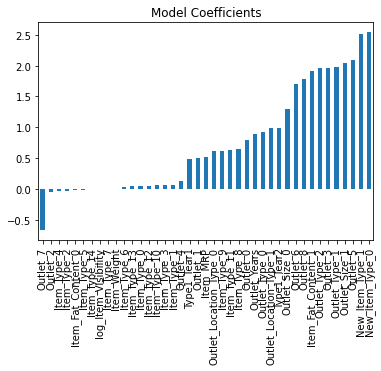

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr_rg = LinearRegression(fit_intercept=False)
train(lr_rg, X_norm, y)
coef = pd.Series(lr_rg.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.2872312692273026
RMSE: 0.5359396134148908
CV Score: 0.2893081684040691


<Axes: title={'center': 'Model Coefficients'}>

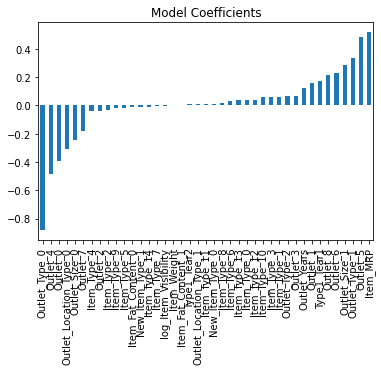

In [13]:
ridge_rg = Ridge(alpha=10, max_iter=1000, solver='saga', fit_intercept=True, tol=0.001)
train(ridge_rg, X_norm, y)
coef = pd.Series(ridge_rg.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.2875083486609318
RMSE: 0.5361980498481245
CV Score: 0.28894407969824704


<Axes: title={'center': 'Model Coefficients'}>

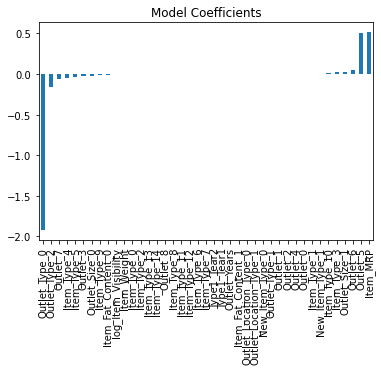

In [14]:
lasso_rg = Lasso(alpha=0.001, tol=1e-06, fit_intercept=True, max_iter=1000)
train(lasso_rg, X_norm, y)
coef = pd.Series(lasso_rg.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.0006498140433413825
RMSE: 0.025491450396973935
CV Score: 0.5656950515044121


<Axes: title={'center': 'Feature Importance'}>

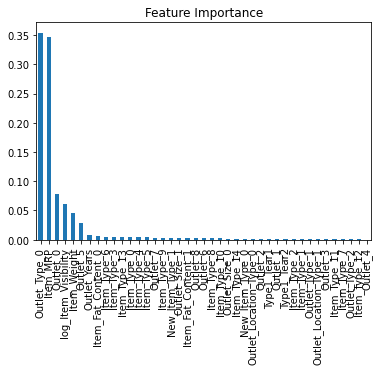

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt_rg = DecisionTreeRegressor(max_depth=30, max_features=30)
train(dt_rg, X_norm, y)
coef = pd.Series(dt_rg.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.04113418543219954
RMSE: 0.2028156439533192
CV Score: 0.30196532580113


<Axes: title={'center': 'Feature Importance'}>

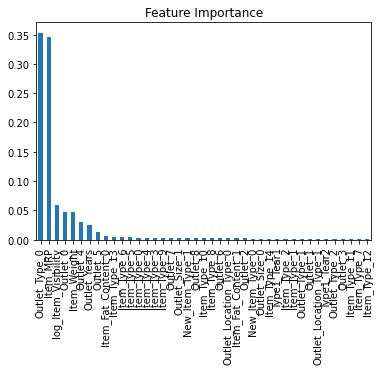

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_rg = RandomForestRegressor(bootstrap=True, max_depth=30, max_features=30, n_estimators=200)
train(rf_rg, X_norm, y)
coef = pd.Series(rf_rg.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
max_depths = []
for i in range(100):
  max_depth = rf_rg.estimators_[i].tree_.max_depth
  max_depths.append(max_depth)

print('Average : ', np.mean(max_depths))
print('Max : ', max(max_depths))

Average :  5.0
Max :  5


Model Report
MSE: 0.04164764911219607
RMSE: 0.20407755661070637
CV Score: 0.30329452810409585


<Axes: title={'center': 'Feature Importance'}>

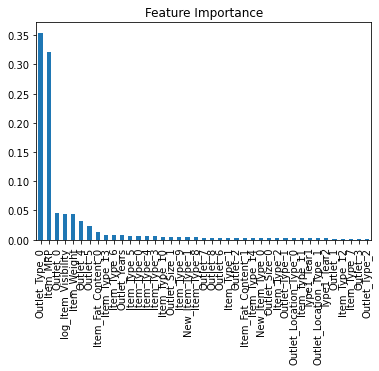

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
et_rg = ExtraTreesRegressor(bootstrap=True, max_depth=30, max_features=30, n_estimators=200)
train(et_rg, X_norm, y)
coef = pd.Series(et_rg.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

# GridSearchCV - RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators':[100, 150, 200],
    #'rf_reg__max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[40,50,60]
}

In [ ]:
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# scoring=scoring

# Fit the grid search object to the data
grid_search.fit(X_norm, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50, 60],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
model_name = 'RandomForestRegressor'

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.162827,0.345324,0.054423,0.002723,40,100,"{'max_depth': 40, 'n_estimators': 100}",-0.314246,-0.309066,-0.302230,-0.315046,-0.298153,-0.307748,0.006629,7
1,6.747074,0.878720,0.103024,0.043788,40,150,"{'max_depth': 40, 'n_estimators': 150}",-0.313533,-0.310455,-0.300191,-0.314877,-0.295670,-0.306945,0.007634,3
2,8.296183,0.277091,0.101024,0.002432,40,200,"{'max_depth': 40, 'n_estimators': 200}",-0.311067,-0.311271,-0.301036,-0.314598,-0.296637,-0.306922,0.006862,2
3,4.164578,0.338613,0.052331,0.001936,50,100,"{'max_depth': 50, 'n_estimators': 100}",-0.315763,-0.312828,-0.303123,-0.314199,-0.297429,-0.308668,0.007146,9
4,6.115156,0.081383,0.085149,0.007019,50,150,"{'max_depth': 50, 'n_estimators': 150}",-0.314761,-0.311592,-0.298255,-0.314028,-0.296722,-0.307072,0.007910,4
5,8.349357,0.294774,0.103041,0.008672,50,200,"{'max_depth': 50, 'n_estimators': 200}",-0.313928,-0.312135,-0.299541,-0.311906,-0.297057,-0.306913,0.007112,1
6,3.987000,0.280125,0.052162,0.001004,60,100,"{'max_depth': 60, 'n_estimators': 100}",-0.316425,-0.313091,-0.301564,-0.313701,-0.296646,-0.308286,0.007737,8
7,6.223615,0.371359,0.078388,0.002158,60,150,"{'max_depth': 60, 'n_estimators': 150}",-0.314303,-0.312354,-0.300032,-0.313864,-0.297340,-0.307579,0.007339,6
8,8.144933,0.289278,0.109588,0.010663,60,200,"{'max_depth': 60, 'n_estimators': 200}",-0.314506,-0.311160,-0.302377,-0.312685,-0.296873,-0.307520,0.006761,5


In [ ]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
print(best_estimator)

RandomForestRegressor(max_depth=50, n_estimators=200)


Stacking

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

lr_rg = LinearRegression(fit_intercept=False)
ridge_rg = Ridge(alpha=10, max_iter=1000, solver='saga', fit_intercept=True, tol=0.001)
lasso_rg = Lasso(alpha=0.001, tol=1e-06, fit_intercept=True, max_iter=1000)
dt_rg = DecisionTreeRegressor(max_depth=5, max_features=35)
rf_rg = RandomForestRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=1000)
et_rg = ExtraTreesRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=1000)
svr_rg = SVR(C= 0.007, epsilon= 0.005, kernel= 'linear')





In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

In [33]:
from sklearn.model_selection import KFold

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작 ')
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습도니 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [34]:
# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

lr_train, lr_test = get_stacking_base_datasets(lr_rg, X_train_n, y_train_n, X_test_n, 5)
ridge_train, ridge_test = get_stacking_base_datasets(ridge_rg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_rg, X_train_n, y_train_n, X_test_n, 5)
dt_train, dt_test = get_stacking_base_datasets(dt_rg, X_train_n, y_train_n, X_test_n, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_rg, X_train_n, y_train_n, X_test_n, 5)
et_train, et_test = get_stacking_base_datasets(et_rg, X_train_n, y_train_n, X_test_n, 5)
# svr_train, svr_test = get_stacking_base_datasets(svr_rg, X_train_n, y_train_n, X_test_n, 5)

LinearRegression model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
Ridge model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
Lasso model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
DecisionTreeRegressor model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
RandomForestRegressor model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
ExtraTreesRegressor model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작


In [45]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
Stack_final_X_train = np.concatenate((dt_train, rf_train, et_train), axis=1)
Stack_final_X_test = np.concatenate((dt_test, rf_test, et_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용
lasso_final = RandomForestRegressor(n_estimators=200)

# 개별 모델 예측 값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정
lasso_final.fit(Stack_final_X_train, y_train)
final = lasso_final.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.5836122137778814


In [44]:
mse

0.30082822772660595

Stacking _평균을 이용

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)  

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_norm.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (lr_rg, ridge_rg, lasso_rg),
                                                 meta_model = lasso_rg)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: nan (nan)


In [ ]:
score

array([      nan,       nan,       nan,       nan, 0.5068375])

In [ ]:
score()

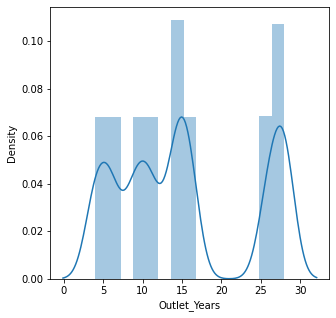

In [60]:
plt.figure(figsize=(5,5))
sns.distplot(df['Outlet_Years'])
plt.show()

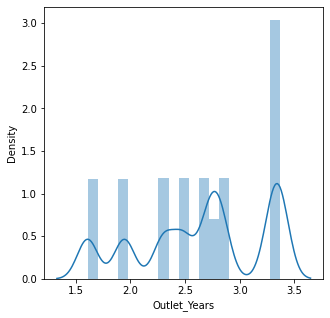

In [55]:
plt.figure(figsize=(5,5))
sns.distplot(np.log1p(df['Outlet_Years']))
plt.show()